In [4]:
import random
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [5]:
# fxn for plotting
def get_ax(figsize=(6,4), fsize=15):
    fig, ax = plt.subplots(figsize=figsize)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return ax, fsize

In [6]:
def sin_fxn(x, amp, freq, phase, offset):
    return amp * np.sin((x * freq) + phase) + offset
def sin_fxn1(x, amp, phase, offset):
    return amp * np.sin(x + phase) + offset

Fitting to a*sin(x+p)+c
	Amplitude (GHz): -0.10239268250420248
	Phase (deg): 47.23393776664987
	Offset (GHz): 0.1451053149031459
Cov:
 [[ 0.00107325  0.00038611 -0.0009257 ]
 [ 0.00038611  0.00584841 -0.00035267]
 [-0.0009257  -0.00035267  0.00081305]]


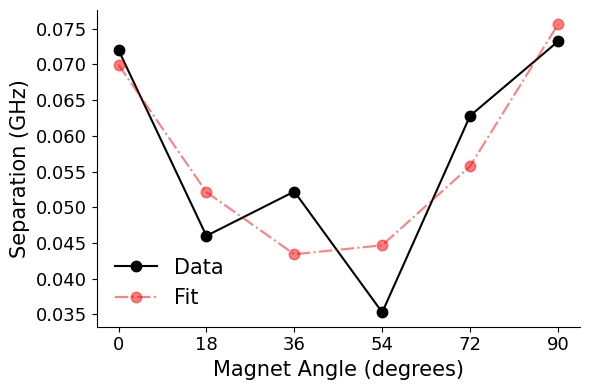

In [7]:
# list of B field angles in radians
angles = np.array([i*18 for i in range(6)]) * (np.pi/180)

# high and low frequencies
f1 = np.array([2.838, 2.84, 2.8461, 2.8527, 2.8729, 2.8718])
f2 = np.array([2.91, 2.886, 2.8983, 2.8880, 2.9357, 2.945])

# seperation between frequencies
sep = np.abs(f1-f2)

print("Fitting to a*sin(x+p)+c")

# fit to sin curve
# param, param_cov = curve_fit(sin_fxn, angles, sep, maxfev=10000)
param1, param_cov1 = curve_fit(sin_fxn1, angles, sep, maxfev=10000)

# found parameters
# amp, freq, phase, offset = param
# print(f"\tAmplitude (GHz): {amp}\n\tFrequency (deg/s): {freq*(180/np.pi)}\n\tPhase (deg): {phase*(180/np.pi)}\n\tOffset (GHz): {offset}")
# print("\nCov:\n", param_cov)

# found parameters
amp1, phase1, offset1 = param1
print(f"\tAmplitude (GHz): {amp1}\n\tPhase (deg): {phase1*(180/np.pi)}\n\tOffset (GHz): {offset1}")
print("Cov:\n", param_cov1)


# sin curve with the found parameters
# fit = [sin_fxn(x, amp, freq, phase, offset) for x in angles]
fit1 = [sin_fxn1(x, amp1, phase1, offset1) for x in angles]

# plotting
ax, fsize = get_ax()

# convert back to degrees
angles *= 180/np.pi

plt.plot(angles, sep, c="0", marker=".", markersize=fsize, label="Data", alpha=1)
# plt.plot(angles, fit, c="r", marker=".", markersize=fsize-5, label="Fit", alpha=0.5, linestyle="-.")
plt.plot(angles, fit1, c="r", marker=".", markersize=fsize, label="Fit", alpha=0.5, linestyle="-.")

plt.xticks(angles, size=fsize-2)
plt.yticks(size=fsize-2)
plt.xlabel("", size=fsize)
plt.ylabel("", size=fsize)

plt.xlabel("Magnet Angle (degrees)", size=fsize)
plt.ylabel("Separation (GHz)", size=fsize)
plt.legend(fontsize=fsize, frameon=False)

plt.tight_layout()
plt.savefig("Plots/CW_ESR.pdf")

In [37]:
class ring:
    def __init__(self):
        self.deltas = np.arange(-2, 2.5, 0.5)
        self.rad_dict = {}
        self.rad_sqr_dict = {}
        for i in np.arange(-2, 2.5, 0.5):
            self.rad_dict[i] = None
            self.rad_sqr_dict[i] = None
    def set_rad(self, delta, radius):
        self.rad_dict[delta] = radius
        self.rad_sqr_dict[delta] = radius**2

In [43]:
p1 = ring()
p1.set_rad(-2, 80)
p1.set_rad()

In [44]:
p_lst = [p1]

In [48]:
ring_nums = np.arange(1,6)
deltas = np.arange(-2, 2.5, 0.5)
delta_plts = []
for delta in deltas:
    rad_sqrs = []
    for p in p_lst:
        rad_sqrs.append(p.rad_sqr_dict[delta])
    delta_plts.append(rad_sqrs)

6400
None
None
None
None
None
None
None
None


In [52]:
delta_plts

[[6400], [None], [None], [None], [None], [None], [None], [None], [None]]